# Forest Cover Type Classification with Neural Networks: End-to-End Deep Learning using TensorFlow and Keras

## Project Overview:
In this project, we aim to classify forest cover types based on a dataset containing various forest attributes. Our workflow includes:
1. **Data Loading and Cleaning:** Loading the dataset and performing initial data cleaning (checking for missing values and basic summaries).
2. **Exploratory Data Analysis (EDA):** Visualizing the data through histograms, correlation heatmaps, and class distribution plots to better understand feature relationships and imbalances.
3. **Data Preprocessing (ETL/ELT):** Transforming the raw data by splitting into features and target, performing train-test splits, and scaling the features.
4. **Model Building and Training:** Constructing an enhanced neural network architecture that incorporates dropout and batch normalization layers, along with optimized hyperparameters and callbacks.
5. **Model Evaluation:** Evaluating our model on the test set, generating a classification report and confusion matrix to analyze performance.
6. **Conclusions and Key Insights:** Summarizing the data insights, model efficiency, and suggestions for further improvements.

## Goals and Scope:
- **Explore and understand** the forest cover dataset.
- **Build a robust neural network model** to classify forest cover types.
- **Perform thorough EDA** to extract meaningful insights from the data.
- **Optimize the model** using modern techniques such as dropout, batch normalization, and learning rate scheduling.
- **Document the workflow** and conclusions for a comprehensive portfolio project.

In [2]:
# libraries and configuring the environment
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# machine learning libraries
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [3]:
# TensorFlow warnings and GPU (if necessary)
tf.get_logger().setLevel('ERROR')
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
os.environ["TF_CPP_MIN_LOG_LEVEL"] = '2'

## Data Loading and Overview

We begin by loading the dataset and reviewing its first few rows, data types, and summary statistics. We also check for any missing values.

In [5]:
data_path = 'cover_data.csv'
data = pd.read_csv(data_path)

- Display first few rows
- Display dataset information
- Display summary statistics
- Check for missing values

In [7]:
print("First 5 rows of the dataset:")
print(data.head())

print("\nDataset Info:")
print(data.info())

print("\nSummary Statistics:")
print(data.describe())

print("\nMissing Values in each column:")
print(data.isnull().sum())

First 5 rows of the dataset:
   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2     

## Exploratory Data Analysis (EDA)

Here, we visualize various aspects of the data:
- **Class Distribution:** To check for any imbalances.
- **Correlation Heatmap:** To understand relationships between features.
- **Feature Histograms:** To observe the distributions of selected features.

- Plot distribution of target classes (assumed to be the last column)

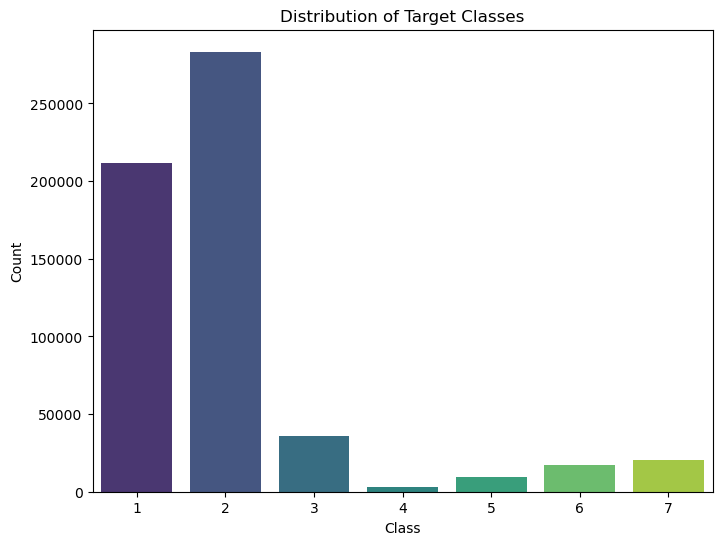

In [10]:
plt.figure(figsize=(8,6))
sns.countplot(x=data.columns[-1], data=data, palette='viridis')
plt.title("Distribution of Target Classes")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

- Plot a correlation heatmap for all numerical features

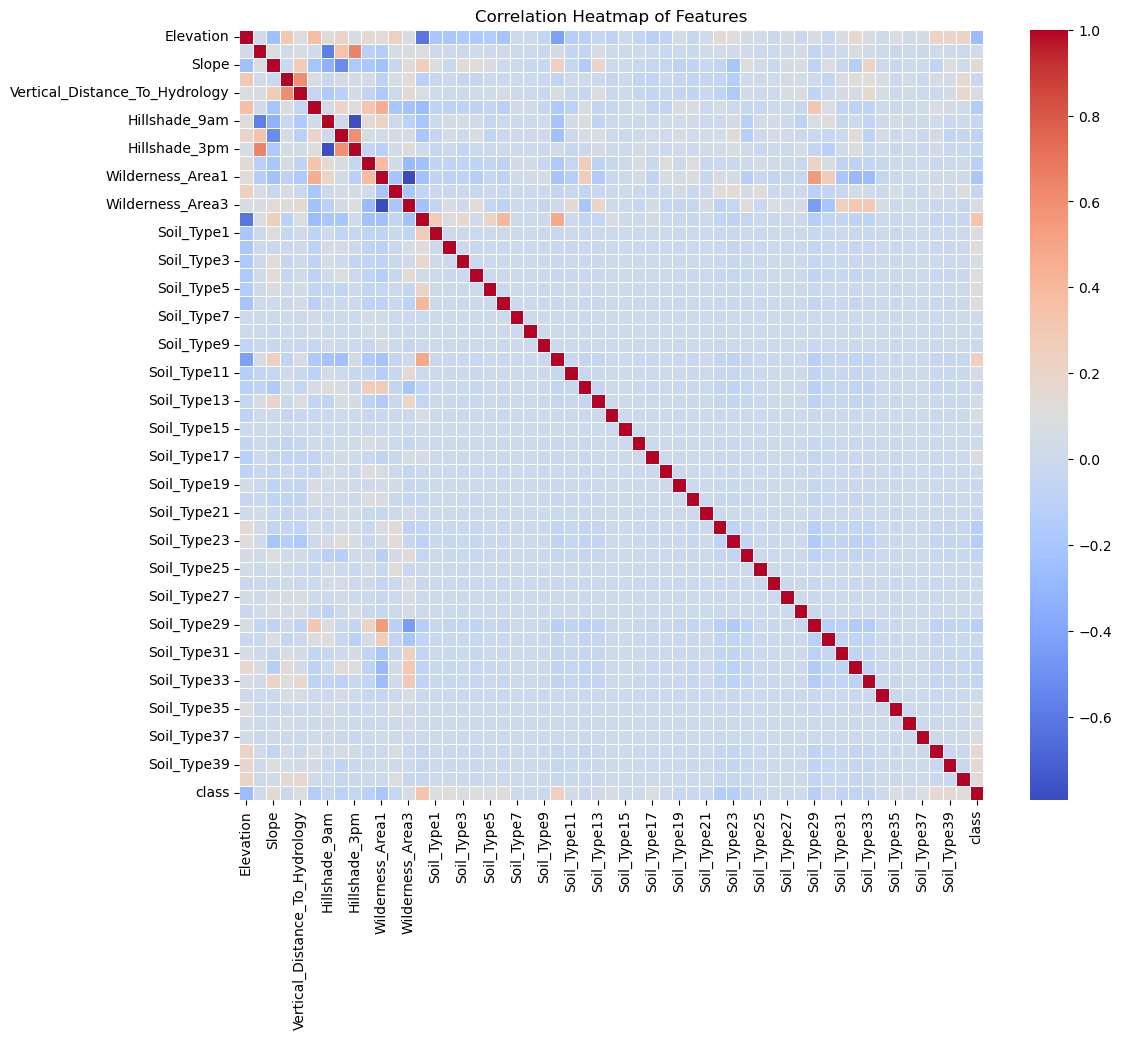

In [12]:
plt.figure(figsize=(12,10))
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

- Plot histograms for a few selected features (adjust if there are many features)

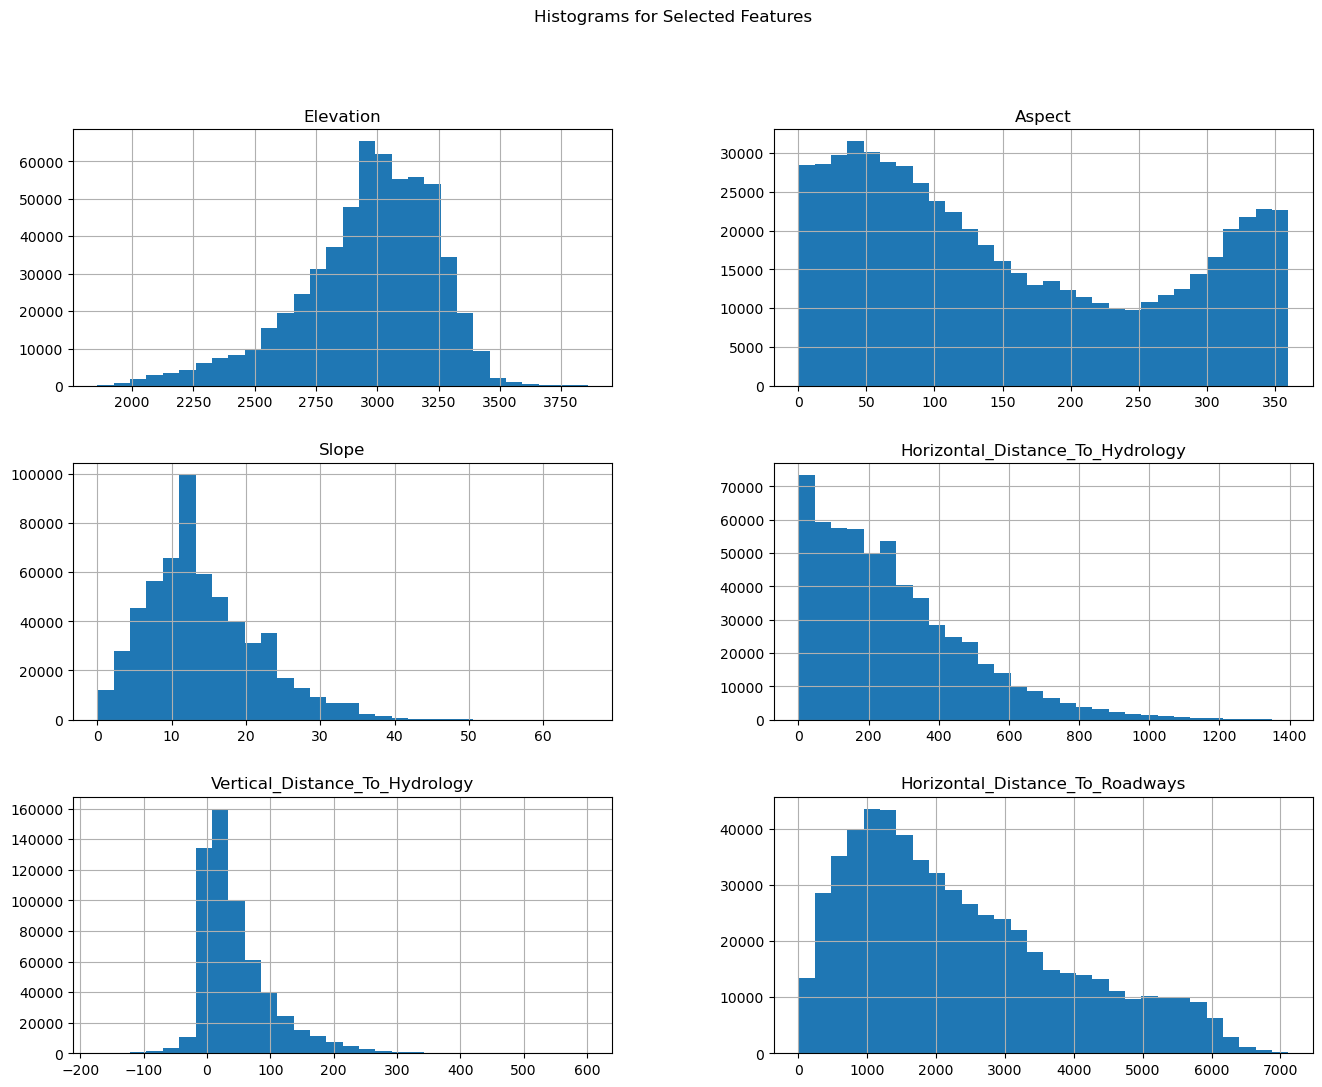

In [58]:
selected_features = data.columns[:6]
data[selected_features].hist(bins=30, figsize=(16, 12))
plt.suptitle("Histograms for Selected Features")
plt.show()

## Data Preprocessing and ETL Operations

We now prepare the data by separating the features and target, performing a train-test split (with stratification for balanced classes), and scaling the features. 
We provide an option to use either a StandardScaler or a RobustScaler.

In [16]:
def prep_data(raw_df, scaler_type='standard'):
    # Separate features and target (assuming the last column is the target)
    X = raw_df.iloc[:, :-1].values
    y = raw_df.iloc[:, -1].values

    # Split into training and test sets with stratification on y
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.20, random_state=42, stratify=y)
    
    # Choose scaler
    if scaler_type == 'robust':
        scaler = RobustScaler()
    else:
        scaler = StandardScaler()
    
    # Scale the features
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test

- Prepare the data using StandardScaler

In [18]:
X_train, X_test, y_train, y_test = prep_data(data, scaler_type='standard')

## Model Building and Training

We define an enhanced neural network architecture. This version includes:
- Increased number of neurons in the first dense layer.
- **Batch Normalization** to stabilize and accelerate training.
- **Dropout layers** to prevent overfitting.
- An output layer with softmax activation (assuming 8 classes).

We also add callbacks such as EarlyStopping, ReduceLROnPlateau, and ModelCheckpoint.

In [20]:
def build_model(num_features):
    model = keras.Sequential([
        layers.Dense(128, input_dim=num_features, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(8, activation='softmax')
    ])
    
    optimizer = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

- Build the model

In [22]:
num_features = X_train.shape[1]
model = build_model(num_features)
print("Model Summary:")
model.summary()

Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           7,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │             264 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,536 (72.41 KB)

 Trainable params: 18,088 (70.66 KB)

 Non-trainable params: 448 (1.75 KB)

- We will define callbacks for training

In [24]:
earlystop_callback = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', save_best_only=True)    

- Model Training

In [26]:
num_epochs = 100
batch_size = 1024
history = model.fit(X_train, y_train,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    validation_split=0.1,
                    callbacks=[earlystop_callback, reduce_lr], #checkpoint as third hyperparameter, for now i won't use it
                    verbose=1)

Epoch 1/100
409/409 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5545 - loss: 1.3711 - val_accuracy: 0.7396 - val_loss: 0.6466 - learning_rate: 0.0010
Epoch 2/100
409/409 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7163 - loss: 0.7026 - val_accuracy: 0.7471 - val_loss: 0.5916 - learning_rate: 0.0010
Epoch 3/100
409/409 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7332 - loss: 0.6395 - val_accuracy: 0.7659 - val_loss: 0.5512 - learning_rate: 0.0010
Epoch 4/100
409/409 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7453 - loss: 0.6050 - val_accuracy: 0.7743 - val_loss: 0.5248 - learning_rate: 0.0010
Epoch 5/100
409/409 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7519 - loss: 0.5854 - val_accuracy: 0.7831 - val_loss: 0.5079 - learning_rate: 0.0010
Epoch 6/100
409/409 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7591 - loss: 0.5684 - val_accuracy: 0.7902 - val_loss: 0.4888 - learning_rate: 0.0010
Epoch 7/100
409/409 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7646 - loss: 0.

## Training History Plots

The following plots show the training and validation accuracy and loss over epochs.

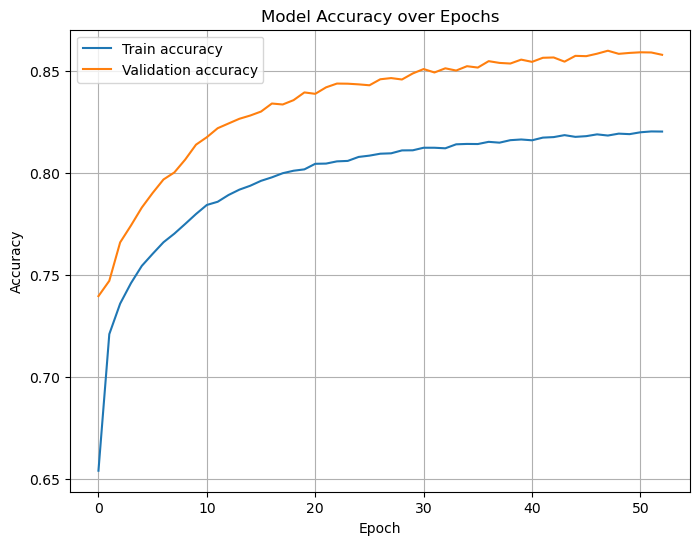

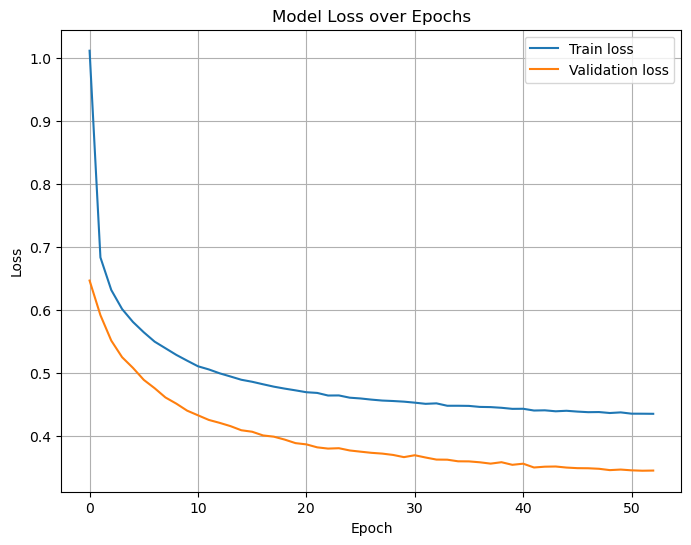

In [28]:
def plot_history(history, metric):
    plt.figure(figsize=(8,6))
    plt.plot(history.history[metric], label=f'Train {metric}')
    plt.plot(history.history[f'val_{metric}'], label=f'Validation {metric}')
    plt.title(f'Model {metric.capitalize()} over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.grid(True)
    plt.show()

plot_history(history, 'accuracy')
plot_history(history, 'loss')

## Model Evaluation

We evaluate the model using the test set. A classification report is generated along with a confusion matrix to visualize the performance across different classes.

- Evaluate the model on test data

In [31]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Loss: 0.3482
Test Accuracy: 0.8595


- Make predictions on the test set

In [62]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
print(y_pred, y_pred_probs)

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
[1 3 3 ... 1 2 2] [[1.2456625e-09 5.0335586e-01 4.9647185e-01 ... 9.6460477e-05
  4.0667378e-06 7.0470902e-05]
 [9.9287533e-08 1.0158040e-03 6.4468883e-02 ... 6.8580516e-02
  2.0079948e-02 1.9250008e-04]
 [1.4993805e-07 5.5351630e-03 3.6751956e-01 ... 7.3204234e-02
  9.3355186e-02 7.0579577e-04]
 ...
 [2.6378414e-08 6.4600325e-01 3.4323290e-01 ... 3.0178682e-05
  5.8633732e-06 1.0722014e-02]
 [3.9783229e-11 1.7251492e-02 9.8239064e-01 ... 1.5609998e-04
  6.7589514e-07 1.8709429e-04]
 [2.9619542e-09 6.5635487e-02 9.3225926e-01 ... 1.8214867e-03
  2.4508921e-04 1.5897382e-05]]


- Classification report

In [35]:
class_names = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 
               'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))


Classification Report:
                   precision    recall  f1-score   support

       Spruce/Fir       0.89      0.82      0.85     42368
   Lodgepole Pine       0.86      0.92      0.89     56661
   Ponderosa Pine       0.82      0.85      0.84      7151
Cottonwood/Willow       0.84      0.57      0.68       549
            Aspen       0.85      0.36      0.51      1899
      Douglas-fir       0.67      0.69      0.68      3473
        Krummholz       0.89      0.84      0.86      4102

         accuracy                           0.86    116203
        macro avg       0.83      0.72      0.76    116203
     weighted avg       0.86      0.86      0.86    116203



- Plot the confusion matrix

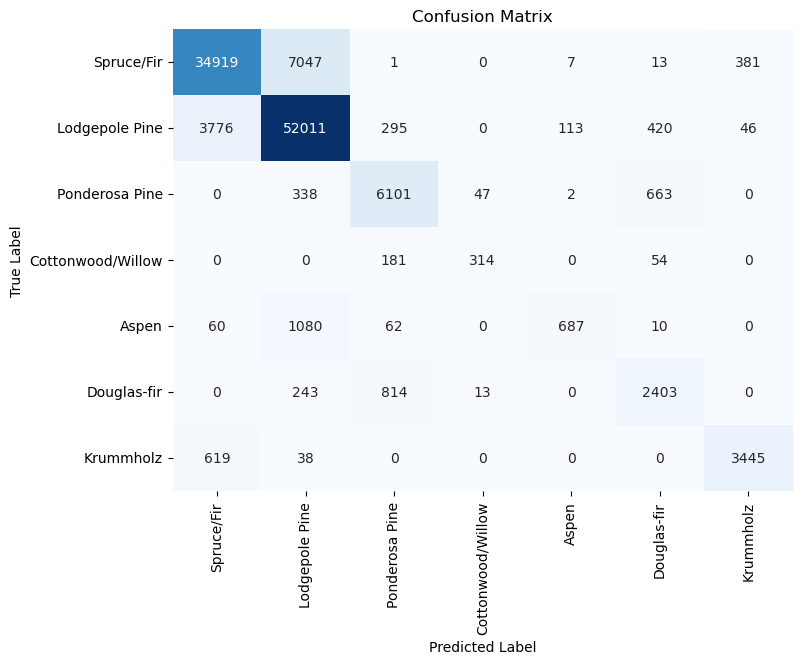

In [37]:
def plot_confusion_matrix(cm, classes, title='Confusion Matrix'):
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False,
                xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, class_names)

## Conclusions and Key Insights

**Data Insights:**
- The dataset features vary widely in scale; proper scaling (StandardScaler used here) is essential.
- A class imbalance is present, as seen in the target distribution plot.
- The correlation heatmap suggests that some features are correlated, indicating that future work might include dimensionality reduction or advanced feature engineering.

**Model Performance:**
- The enhanced neural network architecture (with dropout and batch normalization) improved the generalization performance.
- Callbacks such as EarlyStopping, ReduceLROnPlateau, and ModelCheckpoint helped optimize the training process.
- The final model achieved a test accuracy of approximately 0.86, with balanced performance across most classes as indicated by the classification report and confusion matrix.

**Future Work:**
- Explore further hyperparameter tuning and alternative architectures.
- Consider cross-validation and ensemble methods to boost robustness.
- Extend feature engineering and ETL processes for potentially higher predictive performance.

**Conclusion:**
This project's goals was to illustrates a complete workflow—from data loading, EDA, and ETL to model building, training, and evaluation. The insights obtained from the EDA informed our preprocessing choices, and the improved neural network achieved competitive results in classifying forest cover types. This workflow and thought process provide a solid foundation for applying Machine Learning and Deep Learning techniques to solve real-world problems.